# Ridge Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
diabetes_data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [6]:
diabetes_data['Target'] = diabetes.target

In [7]:
diabetes_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [8]:
X = diabetes_data.drop('Target', axis=1)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [9]:
y = diabetes_data['Target']
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Target, Length: 442, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [11]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
L.fit(X_train,y_train)

LinearRegression()

In [14]:
print(L.coef_)
print(L.intercept_)

[  1.97215433  -7.9354956   22.81036929  16.07481299 -48.56770065
  29.4426331   11.30295638  12.84714481  39.40815092   3.02940906]
150.9093851132686


In [15]:
y_pred = L.predict(X_test)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error
print("R2 score",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))

R2 score 0.5326715876099555
MSE 2492.6346427346502
RMSE 49.92629209879951


In [17]:
## regularization --> Ridge Regression
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [18]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [19]:
print(R.coef_)
print(R.intercept_)

[  1.97216195  -7.93547935  22.81038984  16.07481289 -48.56599259
  29.44126211  11.30221836  12.84695405  39.40749806   3.02941514]
150.9093851132686


In [20]:
y_pred1 = R.predict(X_test)

In [21]:
print("r2_score",r2_score(y_test,y_pred1))
print("RMSE",root_mean_squared_error(y_test,y_pred1))

r2_score 0.5326719466569452
RMSE 49.92627291968708


In [22]:
m= 100
x1 = 5*np.random.rand(m,1)-2
x2 = (0.7*x1**2)-(2*x1+3+np.random.rand(m,1))

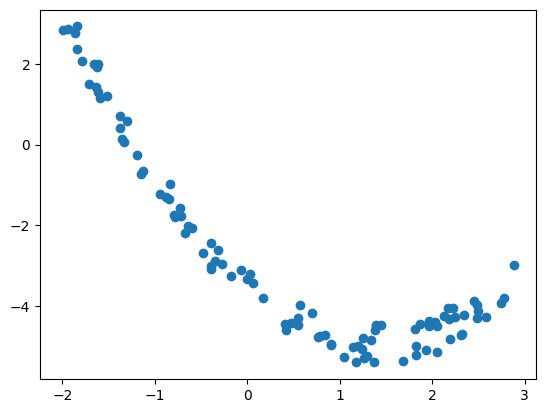

In [23]:
plt.scatter(x1,x2)
plt.show()

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

c:\Users\Ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40696e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.41226e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


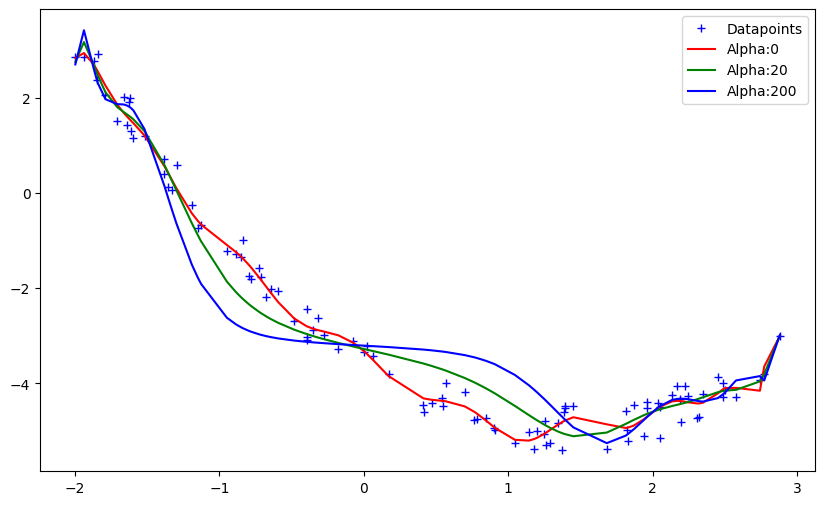

In [26]:
def get_preds_ridge(x1,x2,alpha):
    model=Pipeline([
        ('poly_feats',PolynomialFeatures(degree=20)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas =[0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha,c in zip(alphas,cs):
    preds = get_preds_ridge(x1,x2,alpha)
    #plot
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha:{}'.format(alpha))

plt.legend()
plt.show()
